## Introduction to Neural Network classification with Tensorflow. 
The three major types of classification include:
* Binary Classification
* Multiclass classification
* Multilabel classifcation

 ### Creating data to view and fit

In [23]:
from sklearn.datasets import make_circles

#make 1000 example
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                    random_state=42)


In [24]:
#check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [25]:
#check the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Visualize our dataset
The data is hard to understand hence visualizing it will help us have a clear understanding of the dataset

In [26]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


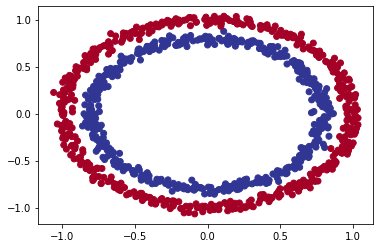

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [28]:
#importing the tensorflow lib
import tensorflow as tf

In [29]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(8, activation="relu", name="hidden_layer_1"),
      tf.keras.layers.Dense(16,activation="relu", name="hidden_layer_2"),
     tf.keras.layers.Dense(32,activation="relu", name="hidden_layer_3"),
    tf.keras.layers.Dense(1, activation="sigmoid",name="classification_layer")
])

model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.BinaryCrossentropy(), #Because its a binary classification
metrics=["accuracy"]  
    
)

loss_history = model.fit(X,y, epochs=80)

Epoch 1/80
32/32 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.5047
Epoch 2/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4857
Epoch 3/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5004
Epoch 4/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5057
Epoch 5/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5241
Epoch 6/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5669
Epoch 7/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6302
Epoch 8/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6195
Epoch 9/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6278
Epoch 10/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6471
Epoch 11/80
32/32 [

In [30]:
#Evaluate your model
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000


[0.0028803732711821795, 1.0]

In [31]:
#Check some of the model prediction. the fist 10 predictions
model.predict(X[:10,:])

array([[9.9987757e-01],
       [9.9987423e-01],
       [9.9586582e-01],
       [9.9798667e-01],
       [5.4312704e-06],
       [9.7424400e-01],
       [9.9945229e-01],
       [9.9994218e-01],
       [9.9984300e-01],
       [1.5750655e-05]], dtype=float32)

Text(0.5, 1.0, 'classification neural net loss curve')

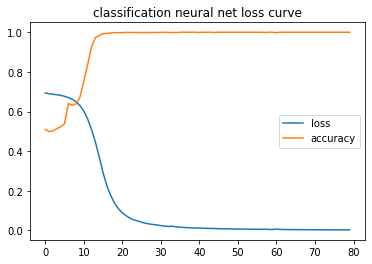

In [32]:
#plot the loss curves of the model
pd.DataFrame(loss_history.history).plot()
plt.title("classification neural net loss curve")

### Plotting our predictions

In [33]:
import numpy as np

import matplotlib.pyplot as plt

#creating a decision boundary
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

    
    

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

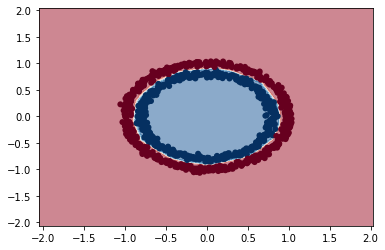

In [34]:
#plot the decision boundary
plot_decision_boundary(X, y, model, cmap='RdBu')

### Activation functions Visualization

#### we will start with..... No.1 Linear activation function
The Linear activation function does not change our input dataset, it returns the same values i.e 
it does not introduce non linearity in our data.

In [35]:
A = tf.cast(tf.range(-10,10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

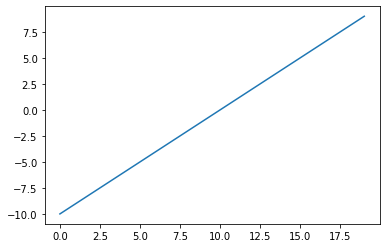

In [36]:
#plot the dataset
linear_data = tf.keras.activations.linear(A)
plt.plot(linear_data)

#### No.2 is Sigmoid activation function

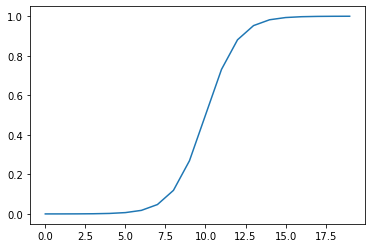

In [37]:
sigmoid_data = tf.keras.activations.sigmoid(A)
plt.plot(sigmoid_data)

#### No.3 is the relu activation function

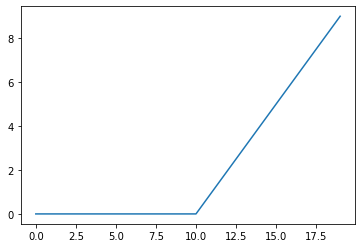

In [38]:
relu_data = tf.keras.activations.relu(A)
plt.plot(relu_data)

#### No.4 Tanh activation function

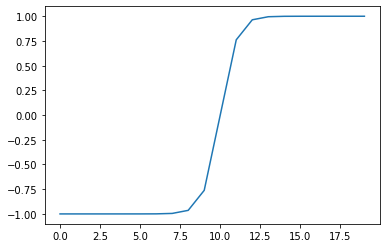

In [39]:
Tanh_data = tf.keras.activations.tanh(A)
plt.plot(Tanh_data)

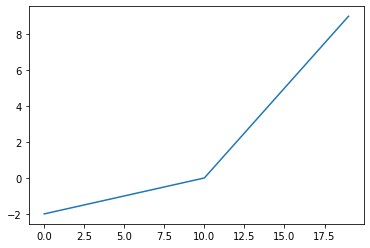

In [40]:
leaky_relu=tf.nn.leaky_relu(A)
plt.plot(leaky_relu)

### Check the accuracy of our models


In [49]:
loss, accuracy = model.evaluate(X,y)
print(f"The model loss is = {loss}")
print(f"The model accuracy is = {(accuracy*100)}")

32/32 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
The model loss is = 0.0028803732711821795
The model accuracy is = 100.0


In [69]:
#get the model predictions
y_pred = model.predict(X)

#Convert the generated predictions to either 0 or 1. for the confusion matriz to work all the datasets must be in same format
#e.g all must be in binary form, hence the reason for the conversion 
y_pred_rounded=tf.round(y_pred)
y_pred_rounded[:10], y[:10]

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], dtype=float32)>,
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [64]:
from sklearn.metrics import confusion_matrix
#Using the confusion matriz as our metrics
#the y_true contains the labels for the testing dataset
cm = confusion_matrix(y_true=y, y_pred=y_pred_rounded)
cm

array([[500,   0],
       [  0, 500]])

In [67]:
import itertools #this tool must be imported for the confusion matrix method below to work

#Define the pretty confusion matrix method here
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[500   0]
 [  0 500]]


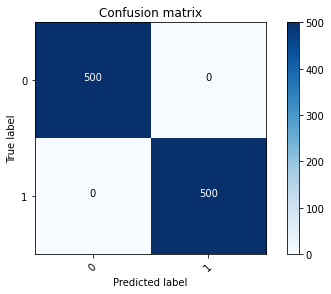

In [70]:
labels=["0","1"]
plot_confusion_matrix(cm=cm,classes=labels)

## Multi-class classification using neural net

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#data already split to test and training sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [76]:
#check the shape of our datasets both for features and their lables
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [85]:
#Check a single train data and later plot it to visualize
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

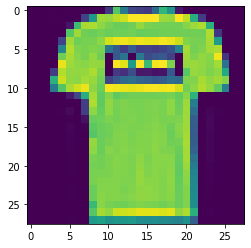

In [88]:
#plot to visualize
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [91]:
#creating a small list to index to our training label
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
            "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

In [ ]:
Pl